In [1]:
import xarray as xr
import pathlib as pl
import pandas as pd
import pywatershed
import os
import dask

In [2]:
all_models = ['01473000', '05431486','09112500','14015000']

In [3]:
os.chdir("..")
base_dir = os.path.abspath(os.curdir)
print(base_dir)

C:\Users\ahaj.GS\nhm_pestpp


In [4]:
cdir = f'{base_dir}/NHM_extractions/20230110_pois_haj/'
print(cdir)

C:\Users\ahaj.GS\nhm_pestpp/NHM_extractions/20230110_pois_haj/


In [5]:
#nhm_id_dict = 

In [6]:
odir = pl.Path(f'{cdir}/01473000/output/')

In [7]:
indat = xr.open_mfdataset(odir.glob('*.nc'))

In [8]:
indat

<xarray.Dataset>
Dimensions:                (time: 15706, nhm_id: 17, nhm_seg: 10, doy: 366)
Coordinates:
  * time                   (time) datetime64[ns] 1979-01-01 ... 2021-12-31
  * nhm_id                 (nhm_id) int32 5621 5625 5628 5635 ... 7128 7156 7157
  * nhm_seg                (nhm_seg) int32 2308 2309 2310 ... 2300 2302 2303
  * doy                    (doy) int32 1 2 3 4 5 6 7 ... 361 362 363 364 365 366
Data variables: (12/151)
    ai                     (time, nhm_id) float64 dask.array<chunksize=(15706, 17), meta=np.ndarray>
    albedo                 (time, nhm_id) float64 dask.array<chunksize=(15706, 17), meta=np.ndarray>
    frac_swe               (time, nhm_id) float64 dask.array<chunksize=(15706, 17), meta=np.ndarray>
    freeh2o                (time, nhm_id) float64 dask.array<chunksize=(15706, 17), meta=np.ndarray>
    freeh2o_change         (time, nhm_id) float64 dask.array<chunksize=(15706, 17), meta=np.ndarray>
    freeh2o_prev           (time, nhm_id) float64 dask.array<chunksize=(15706, 17), meta=np.ndarray>
    ...                     ...
    tminc                  (time, nhm_id) float64 dask.array<chunksize=(15706, 17), meta=np.ndarray>
    pptmix                 (time, nhm_id) float64 dask.array<chunksize=(15706, 17), meta=np.ndarray>
    orad_hru               (time, nhm_id) float64 dask.array<chunksize=(15706, 17), meta=np.ndarray>
    soltab_horad_potsw     (doy, nhm_id) float64 dask.array<chunksize=(366, 17), meta=np.ndarray>
    soltab_potsw           (doy, nhm_id) float64 dask.array<chunksize=(366, 17), meta=np.ndarray>
    soltab_sunhrs          (doy, nhm_id) timedelta64[ns] dask.array<chunksize=(366, 17), meta=np.ndarray>
Attributes:
    Description:  PYNHM output data

In [9]:
df = indat.slow_flow.to_dataframe()
df

slow_flow
time       nhm_id           
1979-01-01 5621     0.000000
           5625     0.000000
           5628     0.000000
           5635     0.000000
           5637     0.000000
...                      ...
2021-12-31 5703     0.013967
           5728     0.017750
           7128     0.016172
           7156     0.000534
           7157     0.000385

[267002 rows x 1 columns]

<Axes: xlabel='time'>

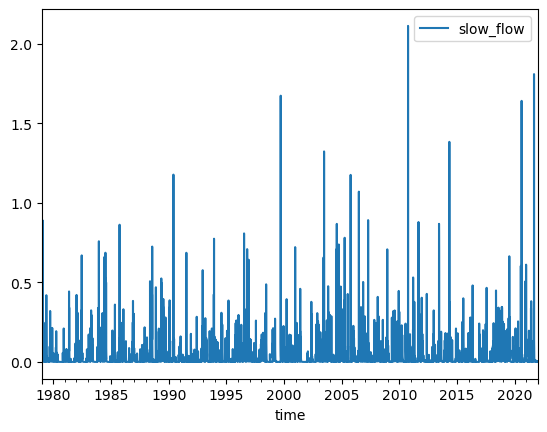

In [10]:
df.xs(5621, level=1).plot()

In [11]:
segout_2308 = indat.seg_outflow.resample(time='M').sum(dim='time').to_dataframe().xs(2308, level=1)
segout_2308

,seg_outflow
time,
1979-01-31,5305.799436
1979-02-28,3069.467094
1979-03-31,2097.724584
1979-04-30,1665.862924
1979-05-31,3152.140527
...,...
2021-08-31,1957.928538
2021-09-30,7513.798271
2021-10-31,1722.826266


In [13]:
#df.xs(2308, level=1)

In [16]:
#.plot()

In [15]:
df.index.dtypes

time      datetime64[ns]
nhm_id             int32
dtype: object

In [17]:
xr.__version__

'0.23.0'